In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Reading the dataset WorldCupsSummary 
summary = pd.read_csv('WorldCupsSummary.csv')
summary.head(10)

,Year,HostCountry,Winner,Second,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,HostContinent,WinnerContinent
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,America,America
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,Europe,Europe
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,Europe,Europe
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,America,America
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,Europe,Europe
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810,Europe,America
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,America,America
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135,Europe,Europe
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975,America,America
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753,Europe,Europe


In [209]:
# Normalization of national team names
summary = summary.replace(['Germany FR'],'Germany')
summary.head(10)

,Year,HostCountry,Winner,Second,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,HostContinent,WinnerContinent
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,America,America
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,Europe,Europe
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,Europe,Europe
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,America,America
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607,Europe,Europe
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810,Europe,America
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,America,America
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135,Europe,Europe
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975,America,America
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753,Europe,Europe


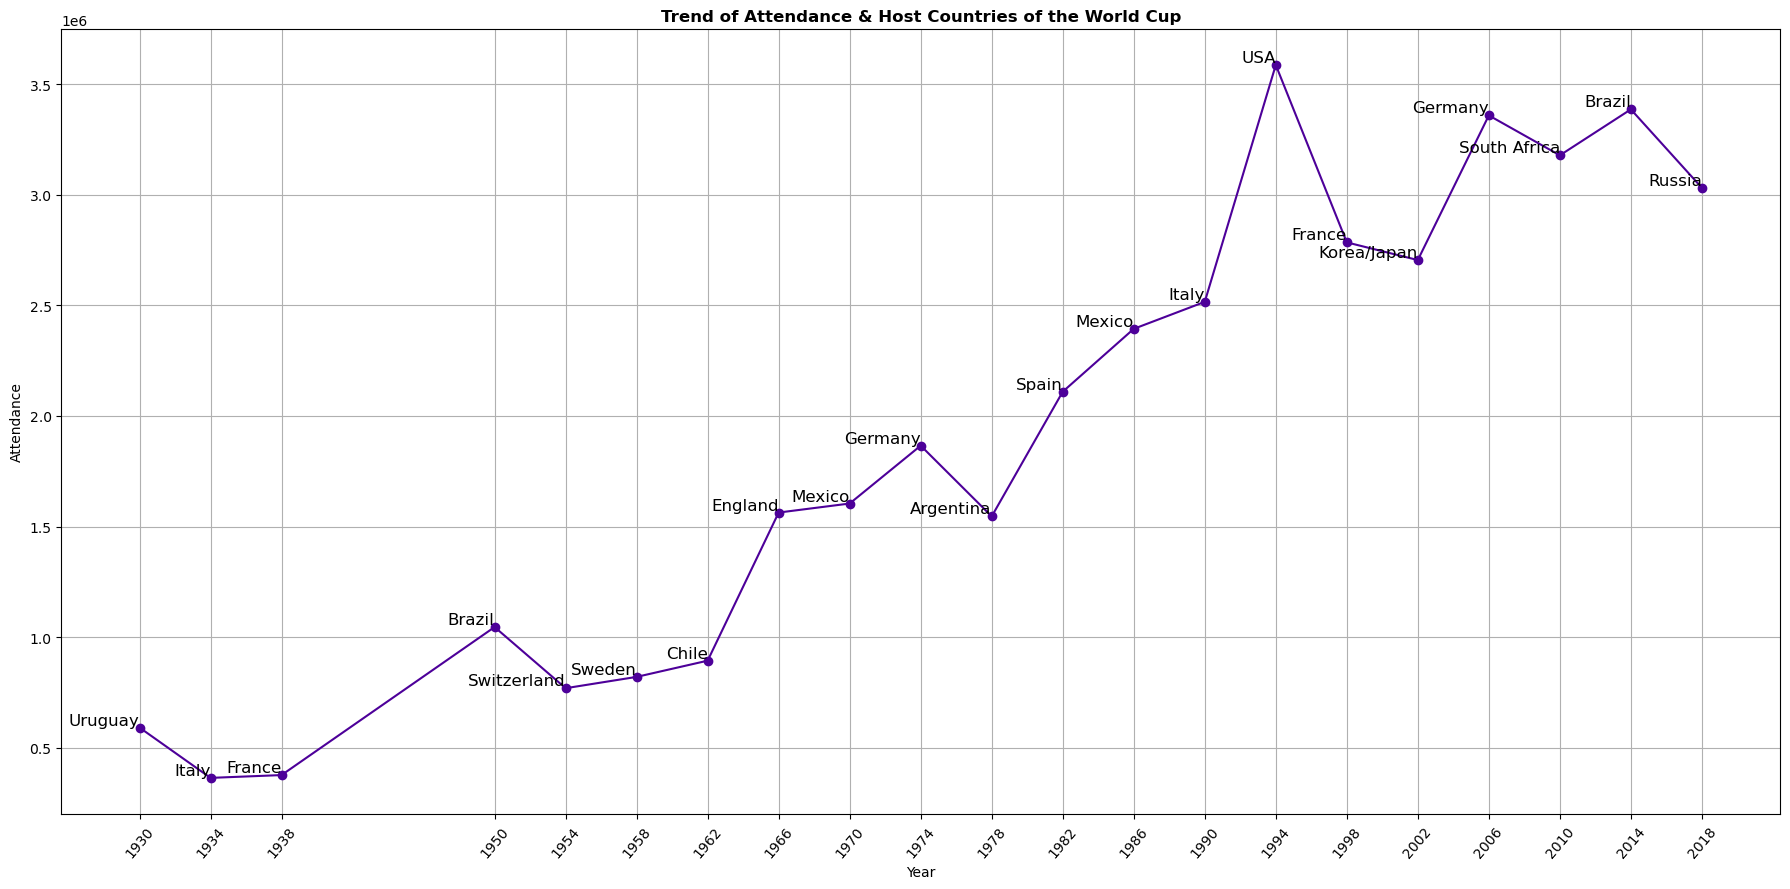

In [41]:
# Plotting trend in the number of live audience attendees over the years
plt.figure(figsize=(18, 9))
nyu = [0.3, 0, 0.6]  # NYU violet color
plt.plot(summary['Year'], summary['Attendance'], marker='o', color=nyu)
plt.title('Trend of Attendance & Host Countries of the World Cup', weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.grid(True)
plt.xticks(summary['Year'], rotation=50)
# Adding text annotations for each point
for i in range(len(summary)):
    plt.text(summary['Year'][i], summary['Attendance'][i], 
             summary['HostCountry'][i], fontsize=12, ha='right', va='bottom')
plt.tight_layout()
plt.show()

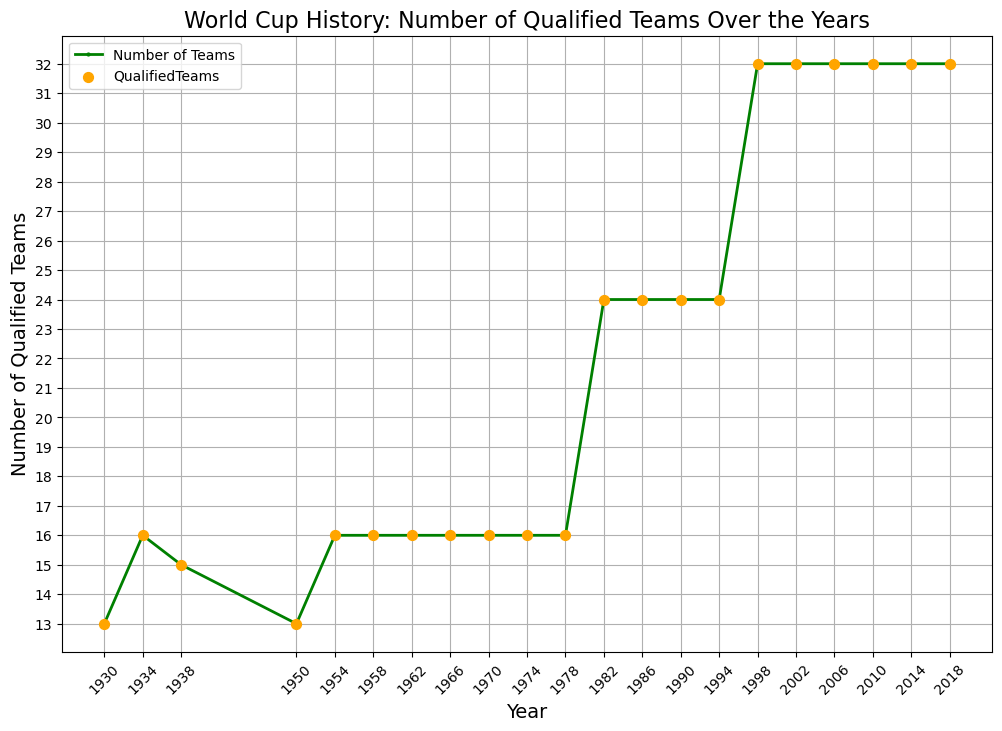

In [42]:
# Plotting trend in the number of participating teams throughout the years
plt.figure(figsize=(12, 8))
plt.plot('Year', 'QualifiedTeams', data=summary, marker='o', color='g', linewidth=2, markersize=2, label='Number of Teams')
plt.scatter('Year', 'QualifiedTeams', data=summary, color='orange', zorder=3, s=50)  
# Customizing the plot
plt.title('World Cup History: Number of Qualified Teams Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Qualified Teams', fontsize=14)
plt.xticks(summary['Year'].unique(), rotation=45)
plt.yticks(range(summary['QualifiedTeams'].min(), summary['QualifiedTeams'].max() + 1))
plt.grid(True)
plt.legend()
plt.show()

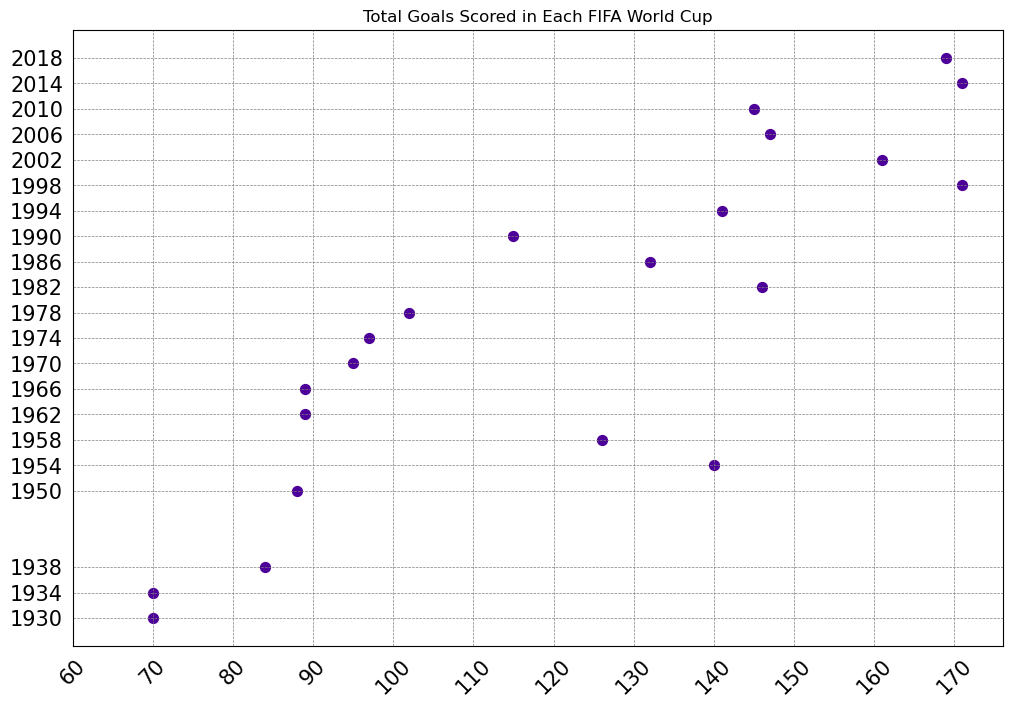

In [43]:
# Plotting the goal scoring trends throughout the years
plt.figure(figsize=(12, 8))
plt.title('Total Goals Scored in Each FIFA World Cup')
plt.scatter(x='GoalsScored', y='Year', data=summary, zorder=1, s=50, color=nyu)
plt.grid(visible=True, color='grey', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=15, bottom=False, left=False)
plt.yticks(summary['Year'].tolist())
plt.xticks(range(60, 180, 10))  # Setting X-ticks for goals scored
plt.xticks(rotation=45)
plt.show()

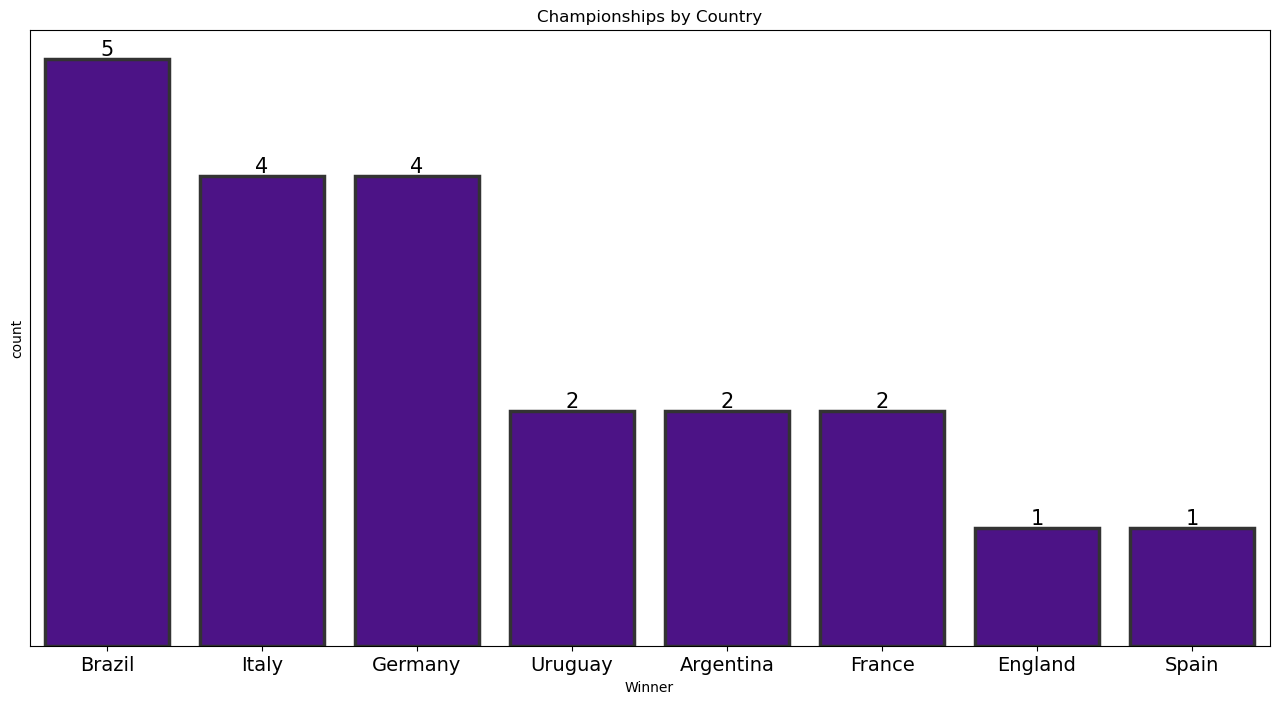

In [44]:
# Plotting total number of World Cup Championships by Country
order = summary['Winner'].value_counts().index
plt.figure(figsize=(16, 8))
plt.title('Championships by Country')
sns.countplot(x='Winner', data=summary, color=nyu, order=order, linewidth=2.5, edgecolor=".2")
plt.tick_params(labelleft=False, left=False, labelsize=14)
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fontsize=15) #Adding labels to our graph
plt.show()

In [206]:
# Data preprocessing (Filling NAs with 0 and calculating top four and final appearances for countries
top_four_counts = summary[['Winner', 'Second', 'Third', 'Fourth']].apply(pd.value_counts).fillna(0).reset_index()
top_four_counts['Top Four Appearances'] = top_four_counts['Winner'] + top_four_counts['Second'] + top_four_counts['Third'] + top_four_counts['Fourth']
top_four_counts['Final Appearances'] = top_four_counts['Winner'] + top_four_counts['Second']
top_four_counts.rename(columns={'index': 'Country'}, inplace=True)
for col in top_four_counts.columns:
    if top_four_counts[col].dtype == 'float64' or top_four_counts[col].dtype == 'float32':  # Check if the column is of float type
        top_four_counts[col] = top_four_counts[col].astype(int)
top_four_counts

,Country,Winner,Second,Third,Fourth,Top Four Appearances,Final Appearances
0,Argentina,2,3,0,0,5,5
1,Austria,0,0,1,1,2,0
2,Belgium,0,0,1,1,2,0
3,Brazil,5,2,2,2,11,7
4,Bulgaria,0,0,0,1,1,0
5,Chile,0,0,1,0,1,0
6,Croatia,0,1,1,0,2,1
7,Czechoslovakia,0,2,0,0,2,2
8,England,1,0,0,2,3,1
9,France,2,1,2,1,6,3


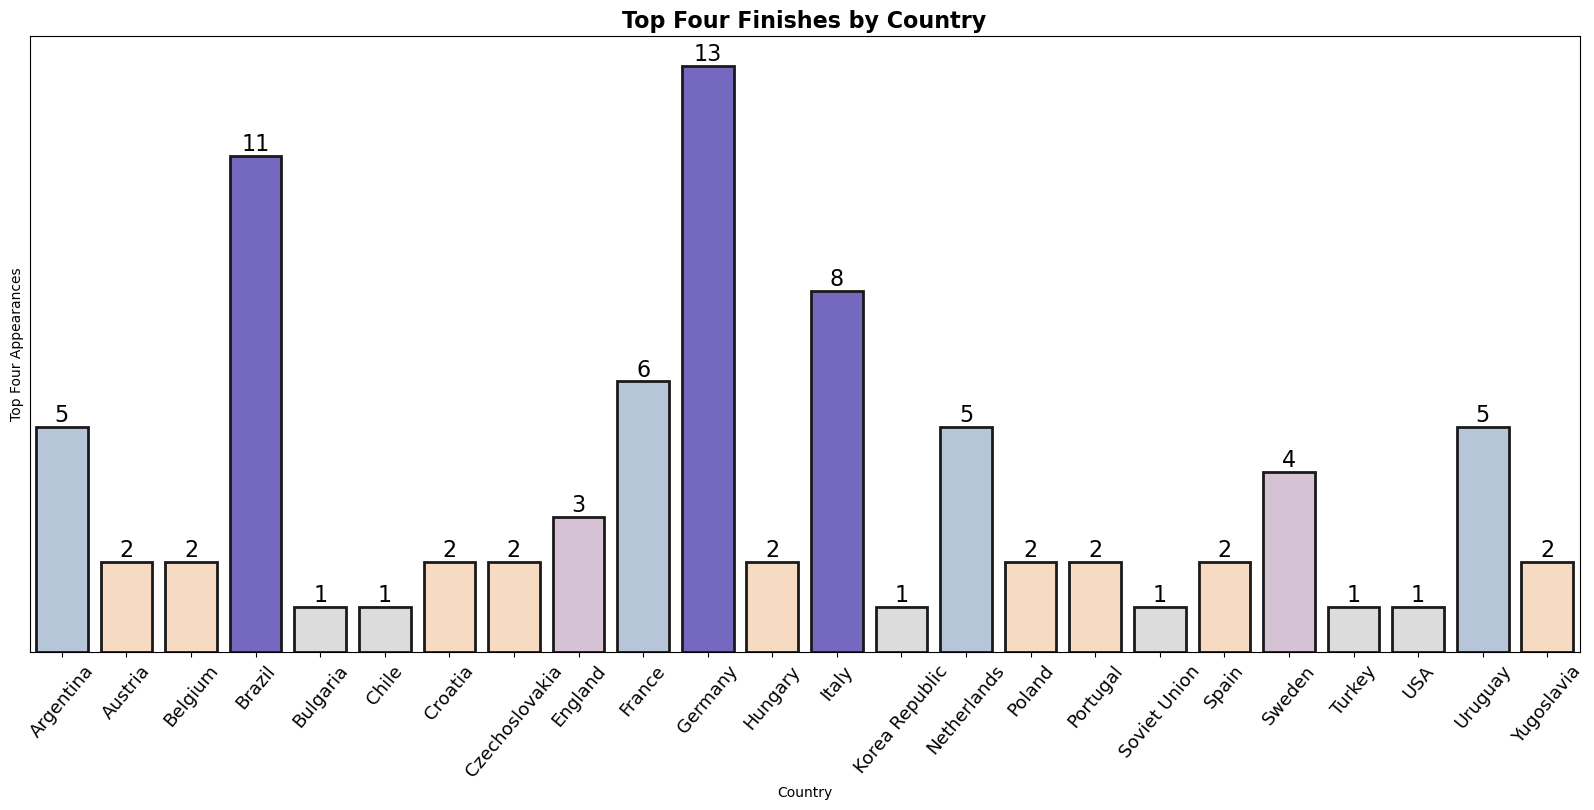

In [46]:
# Helper function to maintain the same color
def choose_color(final_four_count):
    if final_four_count >= 8:
        return 'slateblue'
    elif 5 <= final_four_count < 8:
        return 'lightsteelblue'
    elif 3 <= final_four_count < 5:
        return 'thistle'
    elif final_four_count == 2:
        return 'peachpuff'
    else:
        return 'gainsboro'
top_four_counts['Color'] = top_four_counts['Top Four Appearances'].apply(choose_color)
# Plotting the number of times a Country has reached top Four
plt.figure(figsize=(20, 8))
plt.title('Top Four Finishes by Country', weight = 'bold', size = 16)
sns.barplot(data=top_four_counts, x='Country', y='Top Four Appearances', palette=top_four_counts['Color'], linewidth=2, edgecolor=".1")
plt.tick_params(labelleft=False, left=False, labelsize=13)
plt.xticks(rotation=50)
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fontsize=16) # Adding labels

plt.show()

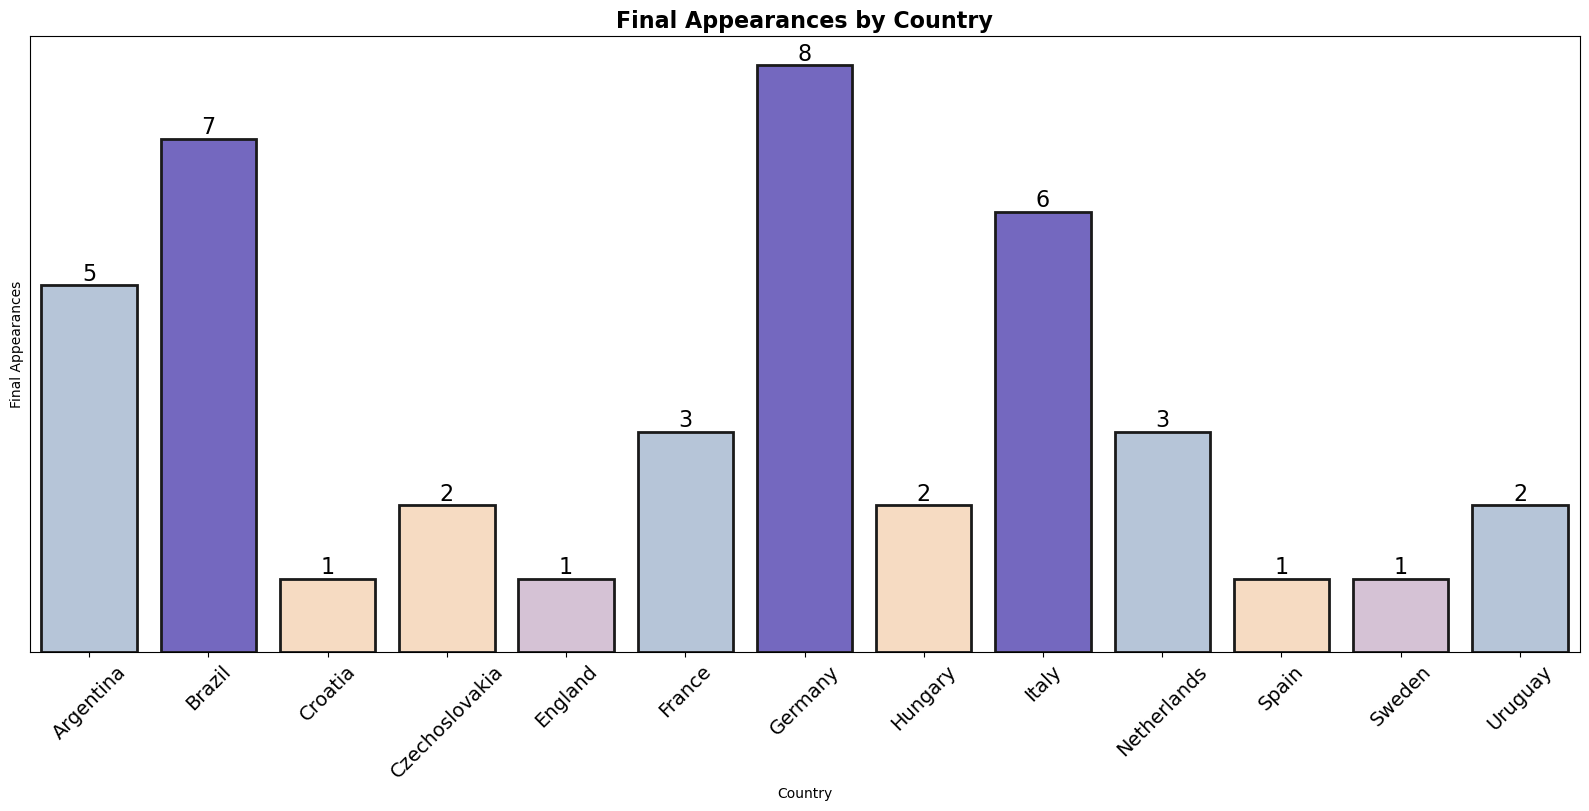

In [47]:
# Helper function to maintain the same color for the same counts
def select_color(final_count):
    if final_count >= 6:
        return 'dodgerblue'
    elif final_count == 5:
        return 'gold'
    elif 3 <= final_count < 5:
        return 'khaki'  
    elif final_count == 2:
        return 'mediumpurple' 
    else:
        return 'lightcoral' 
# Filtering out countries that never reached the final
finalists = top_four_counts.drop(top_four_counts[(top_four_counts['Winner']==0) & (top_four_counts['Second']==0)].index) 
# Plotting World Cup Final Appearances by Country
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('Final Appearances by Country', weight = 'bold', size = 16)
sns.barplot(data=finalists, x='Country', y='Final Appearances', palette=finalists['Color'], linewidth=2, edgecolor=".1")
plt.tick_params(labelleft=False, left=False, labelsize=14)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fontsize=16) # Adding labels

plt.show()

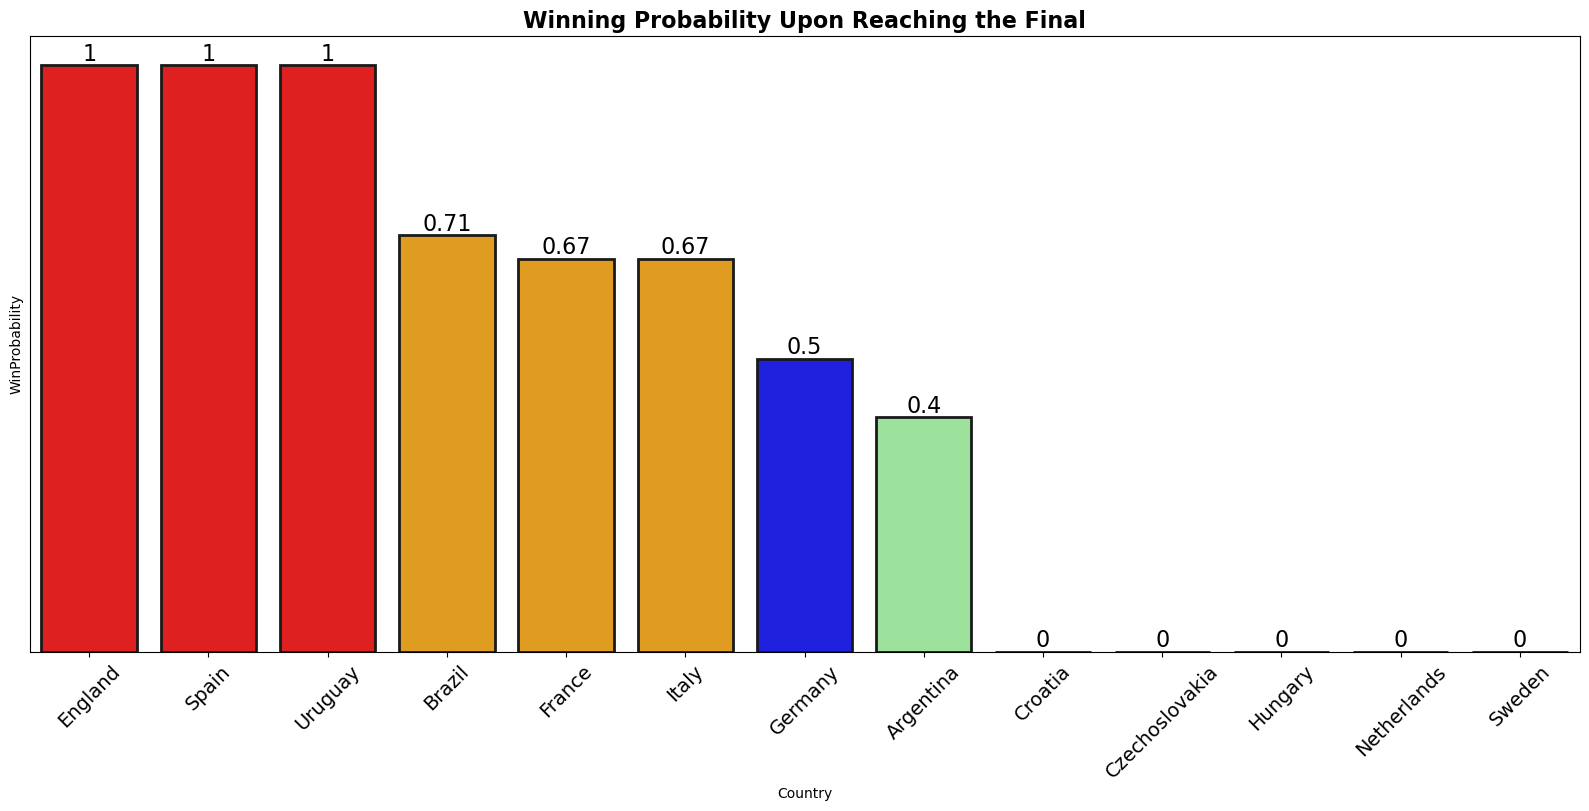

In [48]:
# Helper function to maintain the same color for the same probabilities
def select_color_for_probability(prob):
    if prob == 1:
        return 'red'
    elif 0.5 < prob < 1:
        return 'orange'
    elif prob == 0.5:
        return 'blue'
    else:
        return 'lightgreen'

finalists['WinProbability'] = finalists['Winner'] / finalists['Final Appearances']
# Filtering for countries with at least one second place or win
countries_final_appearances = finalists[(finalists['Second'] > 0) | (finalists['Winner'] > 0)].copy()
# Rounding WinProbability and sorting by it
countries_final_appearances['WinProbability'] = np.round(countries_final_appearances['WinProbability'], decimals=2)
countries_final_appearances = countries_final_appearances.sort_values(by='WinProbability', ascending=False)
countries_final_appearances['Color'] = countries_final_appearances['WinProbability'].apply(select_color_for_probability)
# Plotting winning probability of teams reaching final
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('Winning Probability Upon Reaching the Final' , weight = 'bold', size = 16)
sns.barplot(data=countries_final_appearances, x='Country', y='WinProbability', palette=countries_final_appearances['Color'], linewidth=2, edgecolor=".1")
plt.tick_params(labelleft=False, left=False, labelsize=14)
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=16) # Adding labels

plt.show()

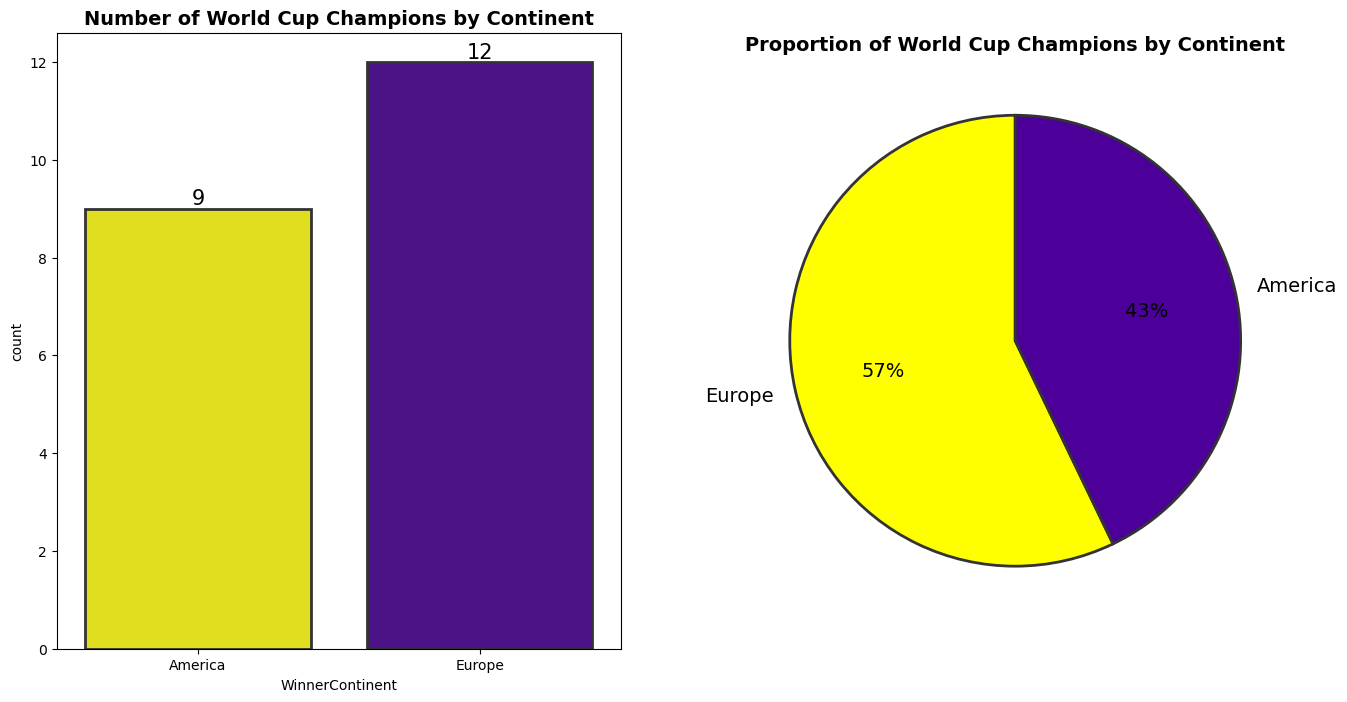

In [49]:
# Extracting the Continents of World Cup winners for plotting
continent_counts = summary['WinnerContinent'].value_counts()
continents = continent_counts.index.tolist()
count_values = continent_counts.values.tolist()
palette = ['yellow', nyu] 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# Plotting number of champions by continent and their respective proportions
sns.countplot(ax=ax[0], x='WinnerContinent', data=summary, palette=palette, linewidth=2, edgecolor=".2")
ax[0].set_title('Number of World Cup Champions by Continent', weight='bold', size=14)
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=15)
# Pie chart
ax[1].pie(count_values, labels=continents, autopct='%.0f%%', colors=palette, wedgeprops=
          {"edgecolor": ".2", 'linewidth': 2, 'antialiased': True}, startangle=90, textprops={'fontsize': 14})
ax[1].set_title('Proportion of World Cup Champions by Continent', size=14, weight='bold')
plt.show()

In [50]:
# Adding new columns to our dataset for plotting
summary['HostTop4'] = summary.apply(lambda row: row['HostCountry'] in [row['Winner'], row['Second'], row['Third'], row['Fourth']], axis=1)
summary['HostTop2'] = summary.apply(lambda row: row['HostCountry'] in [row['Winner'], row['Second']], axis=1)
summary['HostWinner'] = summary.apply(lambda row: row['HostCountry'] == row['Winner'], axis=1)

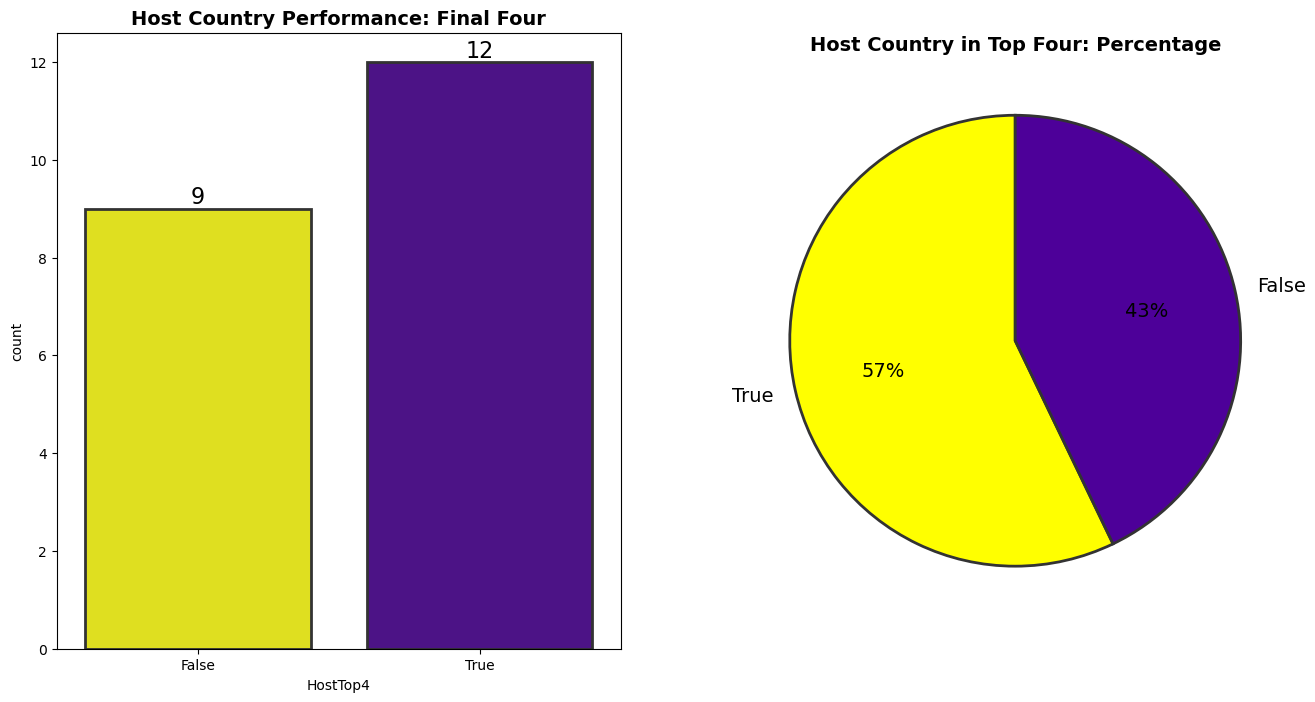

In [51]:
# Counting number of times host countries reaches top 4
top4_counts = summary['HostTop4'].value_counts()
top4_labels = top4_counts.index.tolist()
top4_values = top4_counts.values.tolist()
palette = ['yellow', nyu]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# Plotting the count and probability of host countries in top four
sns.countplot(ax=ax[0], x='HostTop4', data=summary, palette=palette, linewidth=2, edgecolor=".2")
ax[0].set_title('Host Country Performance: Final Four', weight='bold', size=14 )
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=16) # Adding labels
# Pie chart
ax[1].pie(top4_values, labels=top4_labels, autopct='%.0f%%', colors=palette, wedgeprops=
          {"edgecolor": ".2", 'linewidth': 2, 'antialiased': True}, startangle=90, textprops={'fontsize': 14})
ax[1].set_title('Host Country in Top Four: Percentage', size=14, weight='bold')
plt.show()

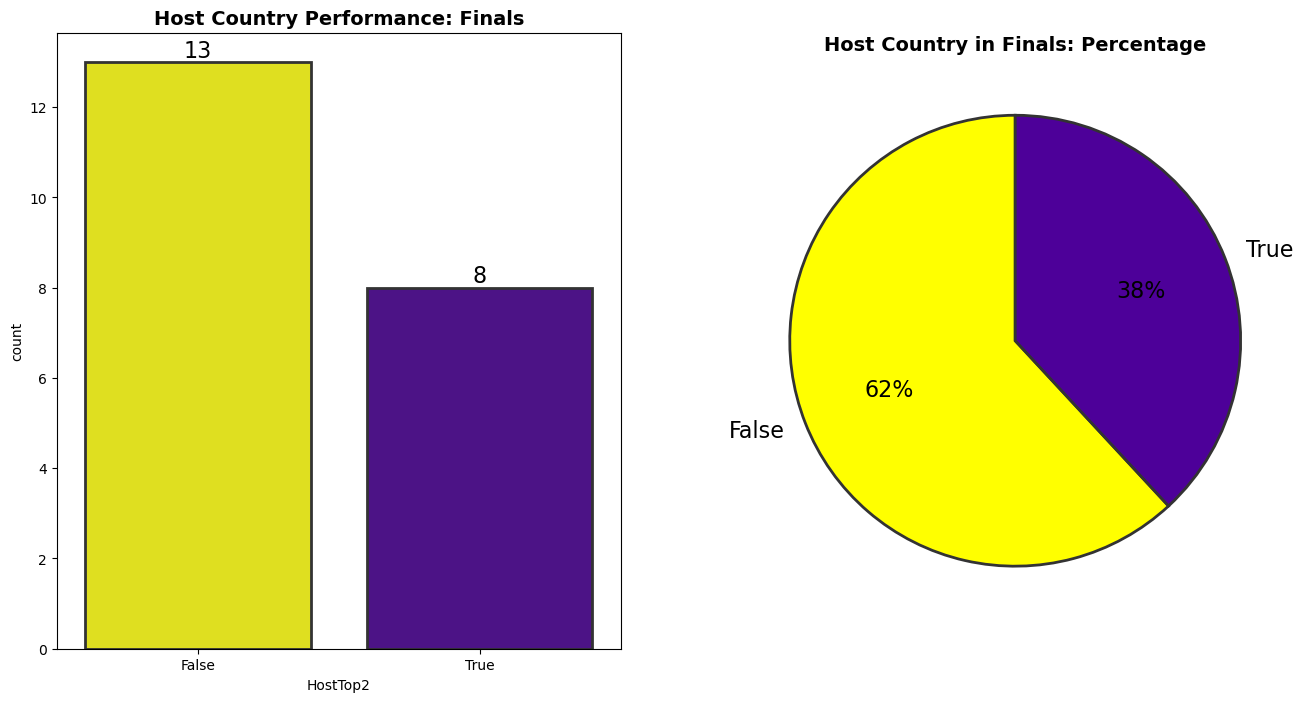

In [52]:
# Counting number of times host countries reaches finals
final_appearance_counts = summary['HostTop2'].value_counts()
final_appearance_labels = final_appearance_counts.index.tolist()
final_appearance_values = final_appearance_counts.values.tolist()
palette = ['yellow', nyu]  
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plotting the count and probability of host countries in finals
sns.countplot(ax=ax[0], x='HostTop2', data=summary, palette=palette, linewidth=2, edgecolor=".2")
ax[0].set_title('Host Country Performance: Finals', weight='bold', size=14)

for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=16) # Adding labels
# Pie chart
ax[1].pie(final_appearance_values, labels=final_appearance_labels, autopct='%.0f%%', colors=palette, wedgeprops=
          {"edgecolor": "0.2", 'linewidth': 2, 'antialiased': True}, startangle=90, textprops={'fontsize': 16})
ax[1].set_title('Host Country in Finals: Percentage', size=14, weight='bold')
plt.show()

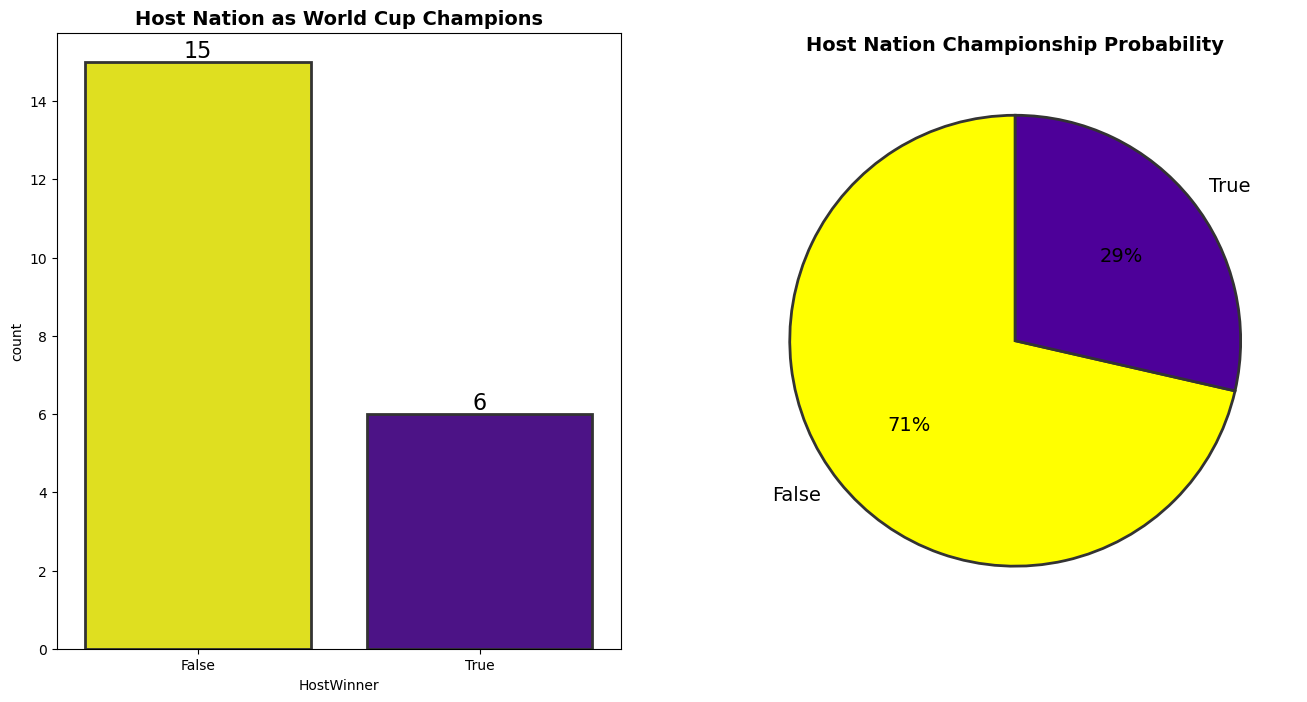

In [53]:
# Counting number of times host countries wins the finals
host_champion_counts = summary['HostWinner'].value_counts()
host_champion_labels = host_champion_counts.index.tolist()
host_champion_values = host_champion_counts.values.tolist()
palette = ['yellow', nyu]  
# Plotting the count and probability of host countries winning the finals 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.countplot(ax=ax[0], x='HostWinner', data=summary, palette=palette, linewidth=2, edgecolor=".2")
ax[0].set_title('Host Nation as World Cup Champions', size=14, weight='bold')
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=16) # Adding labels
# Pie chart 
ax[1].pie(host_champion_values, labels=host_champion_labels, autopct='%.0f%%', colors=palette, wedgeprops={"edgecolor": "0.2", 'linewidth': 2, 'antialiased': True}, startangle=90, textprops={'fontsize': 14})
ax[1].set_title('Host Nation Championship Probability', size=14, weight='bold')
plt.show()

In [205]:
# importing the dataset WorldCupMatches
worldcup_matches = pd.read_csv('WorldCupMatches.csv')

In [190]:
# Normalization of team names and some further data processing
worldcup_matches.replace(['Germany FR'], 'Germany', inplace=True)
worldcup_matches['Home Team Goals'] = worldcup_matches['Home Team Goals'].astype(int)
worldcup_matches['Away Team Goals'] = worldcup_matches['Away Team Goals'].astype(int)
worldcup_matches['Year'] = worldcup_matches['Year'].astype(int)
worldcup_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,difference_goals
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,3
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,1
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,2
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC,0
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER,6
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,63267.0,0.0,0.0,Cüneyt ÇAKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG,0
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED,3


In [76]:
!pip install geopandas

City not found in dataset: Marseilles
City not found in dataset: Rio De Janeiro
City not found in dataset: Berne
City not found in dataset: Solna
City not found in dataset: Malmö
City not found in dataset: Norrköping
City not found in dataset: Udevalla
City not found in dataset: Vina Del Mar
City not found in dataset: Santiago De Chile
City not found in dataset: Frankfurt/Main
City not found in dataset: Berlin West
City not found in dataset: D�Sseldorf
City not found in dataset: Mar Del Plata
City not found in dataset: Seville
City not found in dataset: La Coru�A
City not found in dataset: New York/New Jersey
City not found in dataset: Washington Dc
City not found in dataset: Nelson Mandela Bay/Port Elizabeth
City not found in dataset: Phokeng
City not found in dataset: Tshwane/Pretoria
City not found in dataset: Mangaung/Bloemfontein


C:\Users\xiaoy\AppData\Local\Temp\ipykernel_33108\3615105818.py:31: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


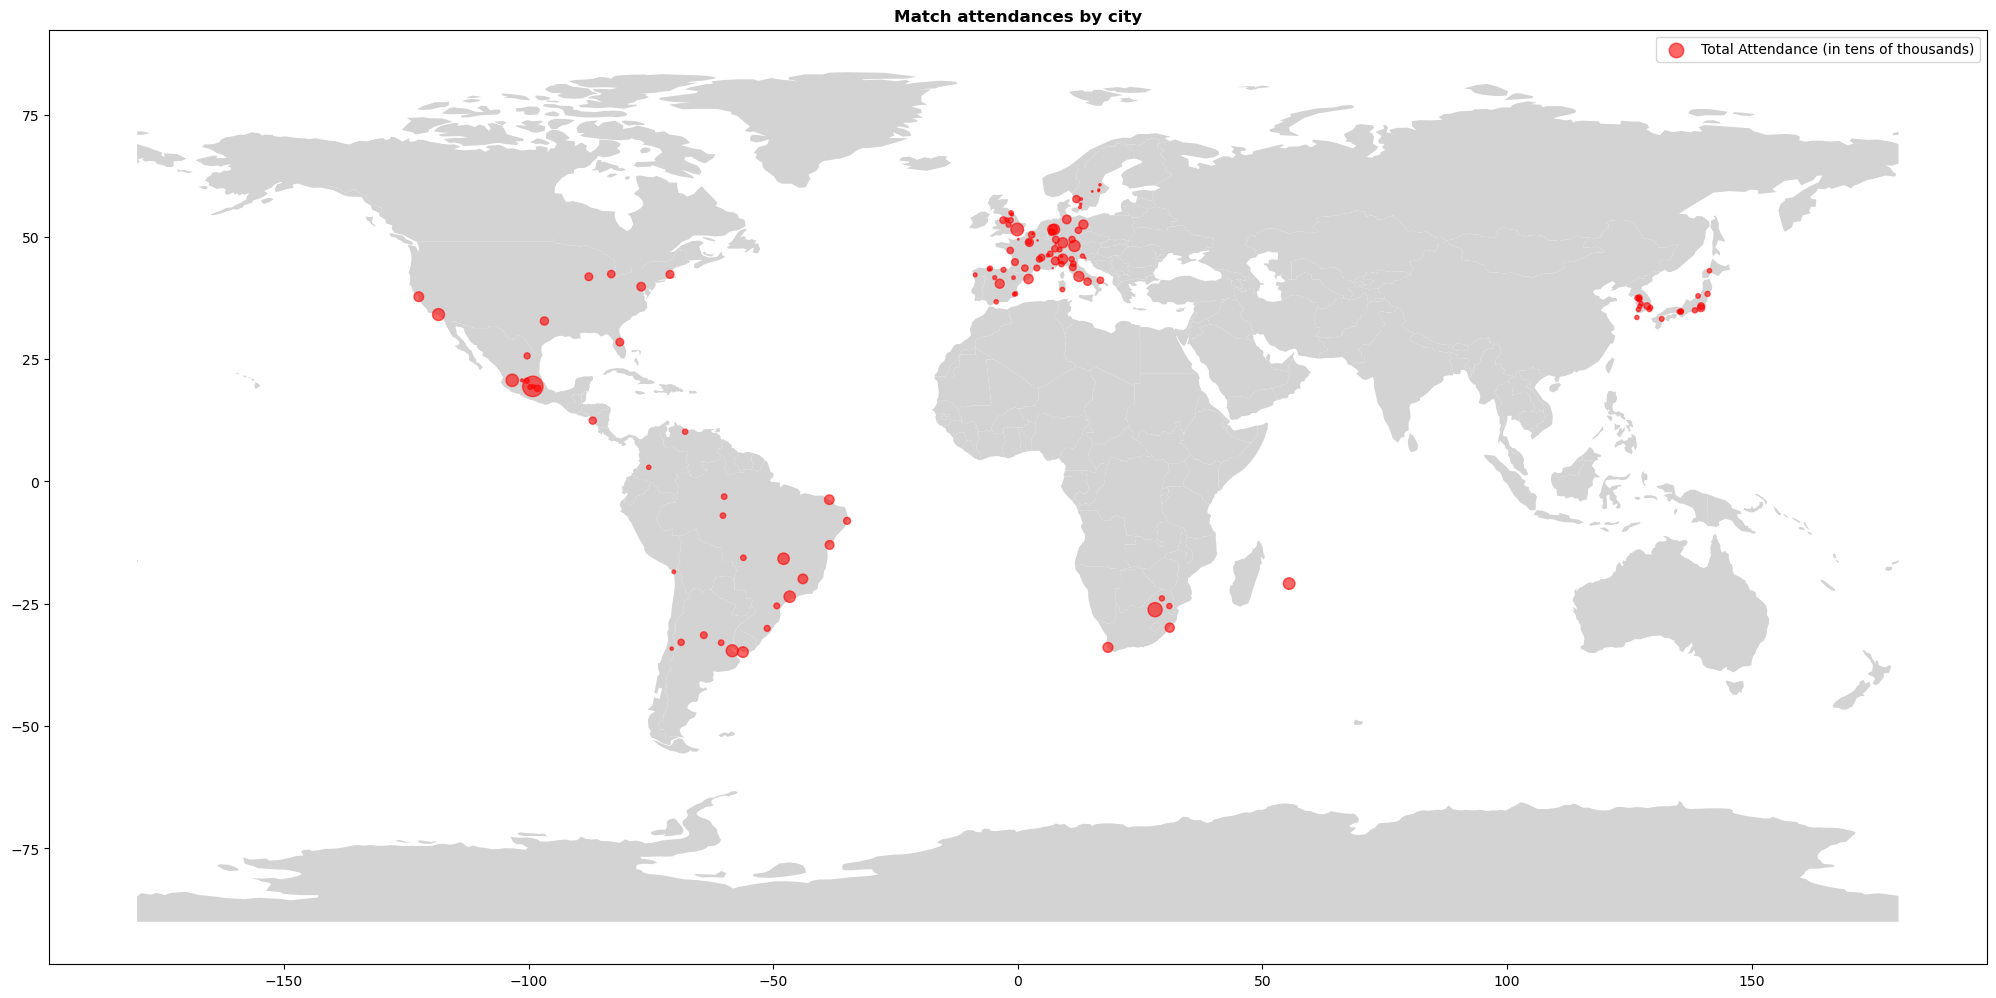

In [176]:
# importing geopandas for analysis
import geopandas as gpd
worldcities_df = pd.read_csv('worldcities.csv')
# data preprocessing, normalization of city names
unique_cities = [city.strip() for city in worldcup_matches['City'].unique()]
corrections = {
    "Malm�": "Malmö",
    "Norrk�Ping": "Norrköping",
}
corrected_cities = [corrections.get(city, city) for city in unique_cities]
filtered_cities_data = []
# using try and except to skip over the cities not found in the dataset
for city in corrected_cities:
    try:
        city_data = worldcup_matches[worldcup_matches['City'].str.strip() == city]
        city_coords = worldcities_df[worldcities_df['city_ascii'] == city].iloc[0]
        total_attendance = city_data['Attendance'].sum() 
        if total_attendance > 0:
            filtered_cities_data.append({
                'city': city,
                'lat': city_coords['lat'],
                'lng': city_coords['lng'],
                'total_attendance': total_attendance
            })
    except IndexError:
        print(f"City not found in dataset: {city}")
# plotting the geoplot of world cup match attendances by city
filtered_df = pd.DataFrame(filtered_cities_data) 
gdf = gpd.GeoDataFrame(
    filtered_df, geometry=gpd.points_from_xy(filtered_df['lng'], filtered_df['lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize=(25, 20))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=gdf['total_attendance'] / 10000, color='red', alpha=0.6, label='Total Attendance (in tens of thousands)')
plt.title('Match attendances by city', weight = 'bold')
plt.legend()
plt.show()


C:\Users\xiaoy\AppData\Local\Temp\ipykernel_33108\1527078448.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\xiaoy\AppData\Local\Temp\ipykernel_33108\1527078448.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_attendance = country_attendance.append(south_korea_row, ignore_index=True)
C:\Users\xiaoy\AppData\Local\Temp\ipykernel_33108\1527078448.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_attendance = country_attendance.append(japan_row, ignore_index=True)


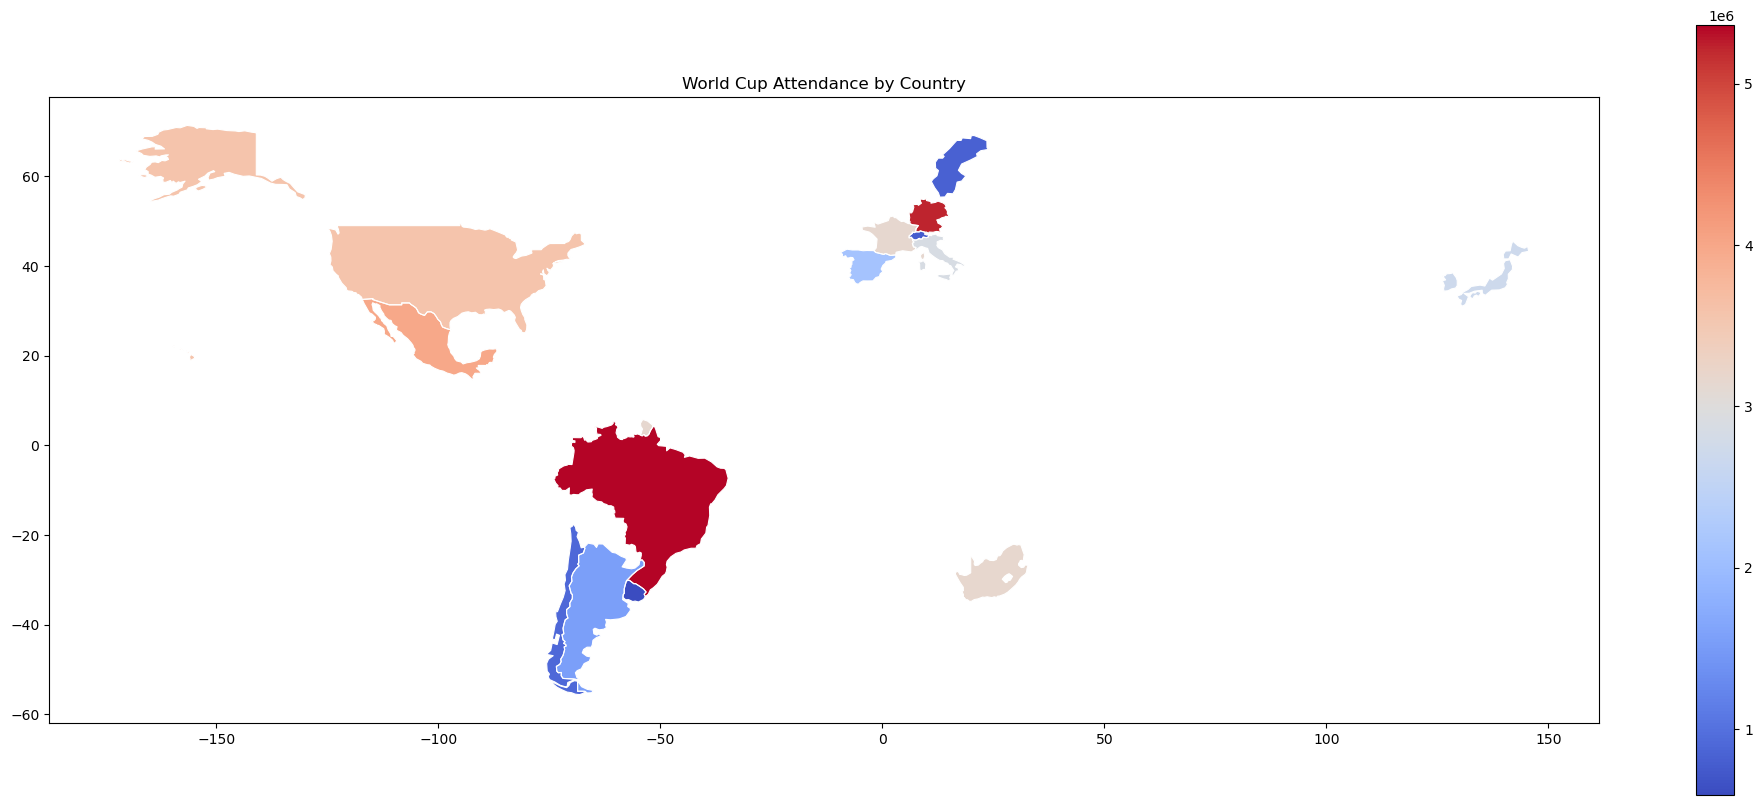

In [191]:
# further data preprocessing such as stripping whitespaces and filling NAs with 0
worldcup_matches['City'] = worldcup_matches['City'].str.strip()
worldcities_df['city_ascii'] = worldcities_df['city_ascii'].str.strip() 
# using the summary dataset to merge the two datasets on Year when the World Cup took place
summary['HostCountry'] = summary['HostCountry'].str.strip()
merged_df = worldcup_matches.merge(summary, on='Year')
merged_df['Attendance_x'] = pd.to_numeric(merged_df['Attendance_x'], errors='coerce').fillna(0)
country_attendance = merged_df.groupby('HostCountry')['Attendance_x'].sum().reset_index()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# some further data preprocessing (changing USA to United States of America and splitting Korea/Japan into two countries)
country_attendance['HostCountry'] = country_attendance['HostCountry'].replace('USA', 'United States of America')
korea_japan_row = country_attendance[country_attendance['HostCountry'] == 'Korea/Japan']
if not korea_japan_row.empty:
    attendance_value = korea_japan_row['Attendance_x'].iloc[0]
    south_korea_row = {'HostCountry': 'South Korea', 'Attendance_x': attendance_value}
    japan_row = {'HostCountry': 'Japan', 'Attendance_x': attendance_value}
    country_attendance = country_attendance.append(south_korea_row, ignore_index=True)
    country_attendance = country_attendance.append(japan_row, ignore_index=True)
    country_attendance = country_attendance[country_attendance['HostCountry'] != 'Korea/Japan']
# using geopandas to plot world cup attendance by country
merged_data = world.merge(country_attendance, left_on='name', right_on='HostCountry', how='left')
hosted_mask = merged_data['Attendance_x'] > 0
merged_data.loc[~hosted_mask, 'geometry'] = None
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
merged_data.boundary.plot(ax=ax, linewidth=0.8, color='white') 
merged_data[hosted_mask].plot(column='Attendance_x', cmap='coolwarm', ax=ax, legend=True)
ax.set_title('World Cup Attendance by Country')
plt.show()

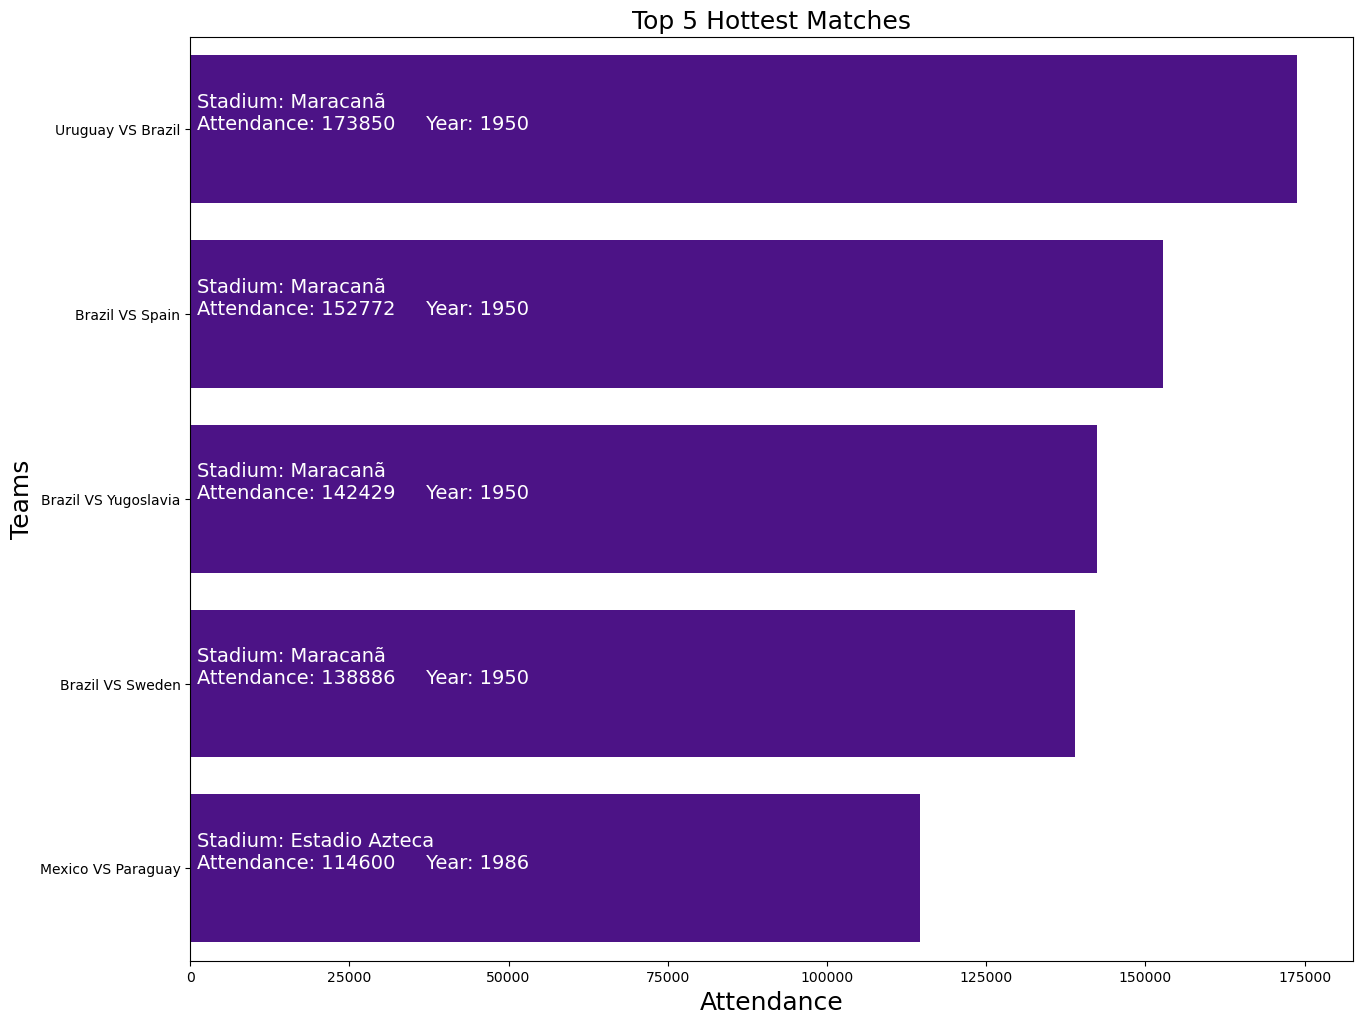

In [204]:
# Plotting top 5 matches by audience attendance
most_attended = worldcup_matches.sort_values(by='Attendance', ascending=False).head(5)
most_attended['Attendance'] = most_attended['Attendance'].astype(int)
most_attended['Matchup'] = most_attended['Home Team Name'] + " VS " + most_attended['Away Team Name']

# Shorten stadium names using lambda, specifically for "Maracanã"
most_attended['Stadium'] = most_attended['Stadium'].apply(lambda x: 'Maracanã' if 'Maracanã' in x else x)

# Create the bar plot
plt.figure(figsize=(15, 12))

ax = sns.barplot(y = most_attended['Matchup'], x = most_attended['Attendance'], palette = [nyu])
plt.xlabel('Attendance', fontsize=18)
plt.ylabel('Teams', fontsize=18)
plt.title('Top 5 Hottest Matches', fontsize=18)
for idx, row in enumerate("Stadium: " + most_attended['Stadium'] + "\nAttendance: " +
                      most_attended['Attendance'].astype(str) + "     Year: " +  most_attended['Year'].astype(str)):
    ax.text(1000, idx, row, fontsize = 14, color = 'white') # Adding labels to our graph

plt.show()


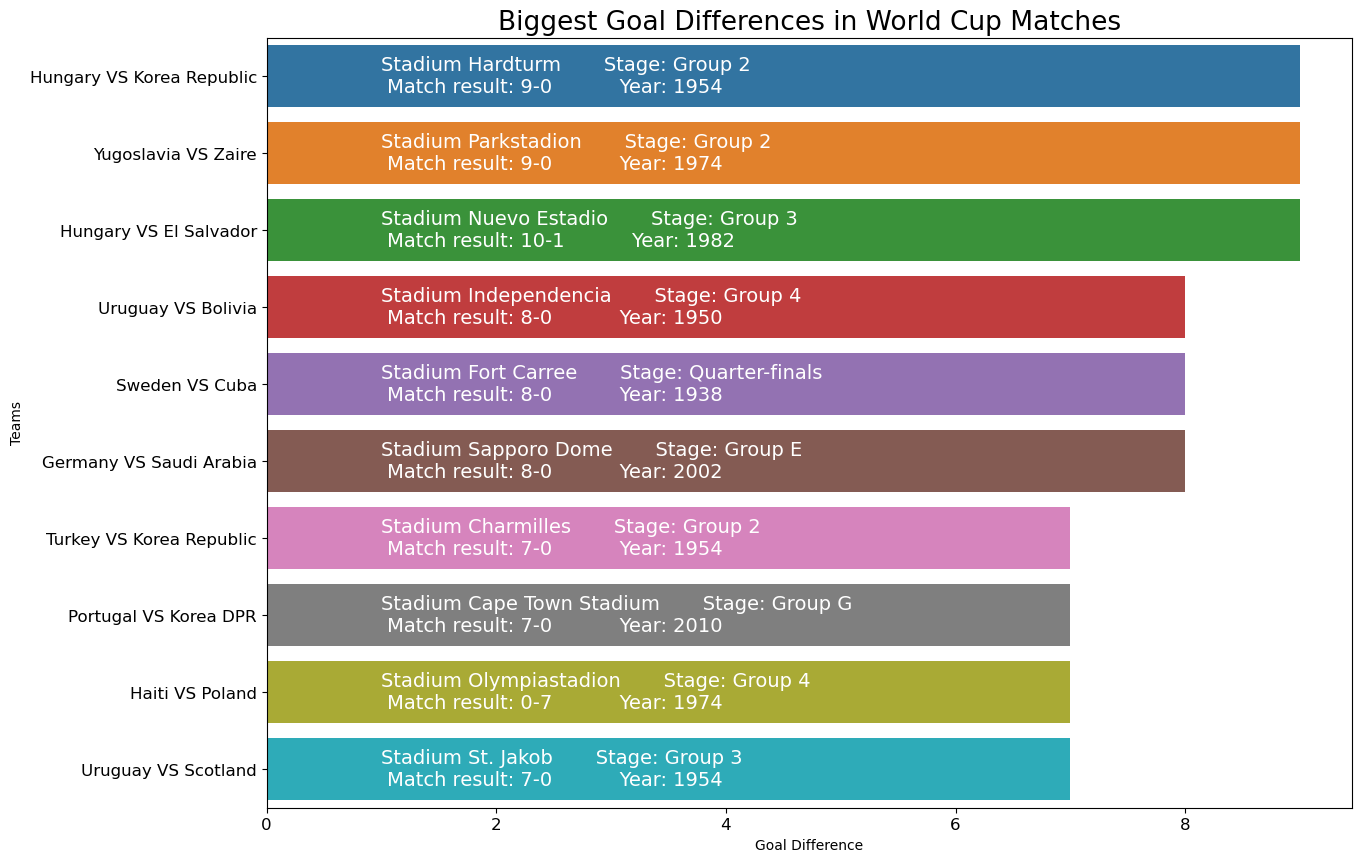

In [194]:
# Further data preprocessing and selecting the columns that we need
worldcup_matches['difference_goals'] = pd.Series.abs(worldcup_matches['Home Team Goals'] - worldcup_matches['Away Team Goals'])
goals_difference = worldcup_matches.sort_values(by='difference_goals', ascending=False).head(10)
goals_difference['result'] = goals_difference['Home Team Goals'].astype(str) + "-" + goals_difference['Away Team Goals'].astype(str)
goals_difference['Matchup'] = goals_difference['Home Team Name'] + " VS " + goals_difference['Away Team Name']

# Plotting the matches with biggest goal differences
plt.figure(figsize=(14, 10))
ax = sns.barplot(y = goals_difference['Matchup'], x = goals_difference['difference_goals']) 
plt.ylabel('Teams')
plt.xlabel('Goal Difference')
plt.yticks(size=12)
plt.xticks(size=12)
plt.title('Biggest Goal Differences in World Cup Matches', size=19)
for idx, row in enumerate("Stadium "+goals_difference['Stadium']  +"       Stage: "+
                      goals_difference['Stage'] + "\n"+ " Match result: "+goals_difference['result'] + "           Year: " +
                        goals_difference['Year'].astype(str) ):
    ax.text(1, idx ,row, fontsize = 14, color = 'white',va = 'center') # Adding labels to our graph
plt.show()


In [199]:
# Calculating total goals for each country in both home and away worldcup_matches
home_goals = worldcup_matches.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
away_goals = worldcup_matches.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()
home_goals.rename(columns={'Home Team Name': 'Country', 'Home Team Goals': 'HomeGoals'}, inplace=True)
away_goals.rename(columns={'Away Team Name': 'Country', 'Away Team Goals': 'AwayGoals'}, inplace=True)
total_goals = pd.merge(home_goals, away_goals, on='Country', how='outer').fillna(0)
total_goals['HomeGoals'] = total_goals['HomeGoals'].astype(int)
total_goals['AwayGoals'] = total_goals['AwayGoals'].astype(int)
total_goals['TotalGoals'] = total_goals['HomeGoals'] + total_goals['AwayGoals']
# Sorting and selecting the top 10 countries by total goals scored
top_goal_scoring_countries = total_goals.sort_values(by='TotalGoals', ascending=False).head(10)
top_goal_scoring_countries

,Country,HomeGoals,AwayGoals,TotalGoals
25,Germany,168,67,235
7,Brazil,180,45,225
2,Argentina,111,22,133
34,Italy,99,29,128
23,France,68,40,108
60,Spain,50,42,92
41,Netherlands,51,40,91
30,Hungary,73,14,87
68,Uruguay,62,18,80
22,England,54,25,79


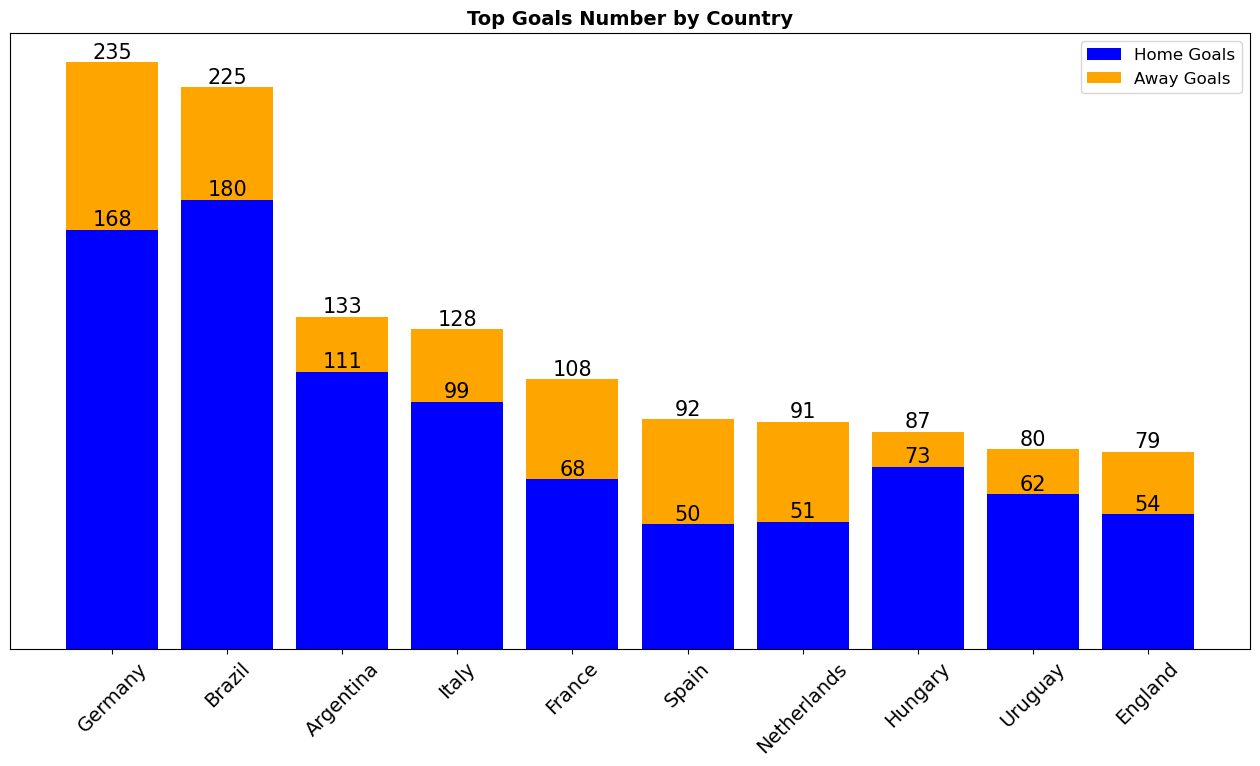

In [200]:
#Plotting the total goal numbers by country
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Top Goals Number by Country', size=14, weight='bold')
color_scheme = ['blue', 'orange', 'green']
bars = ax.bar(top_goal_scoring_countries['Country'], top_goal_scoring_countries['HomeGoals'], color=color_scheme[0])
ax.bar(top_goal_scoring_countries['Country'], top_goal_scoring_countries['AwayGoals'], bottom=top_goal_scoring_countries['HomeGoals'], color=color_scheme[1])
ax.tick_params(labelleft=False, left=False, labelsize=14)
plt.xticks(rotation=45)
ax.legend(['Home Goals', 'Away Goals'], fontsize=12)

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=15)

plt.show()

In [210]:
# Reading the dataset WorldCupPlayers
players_df = pd.read_csv('WorldCupPlayers.csv')
players_df.head(10)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


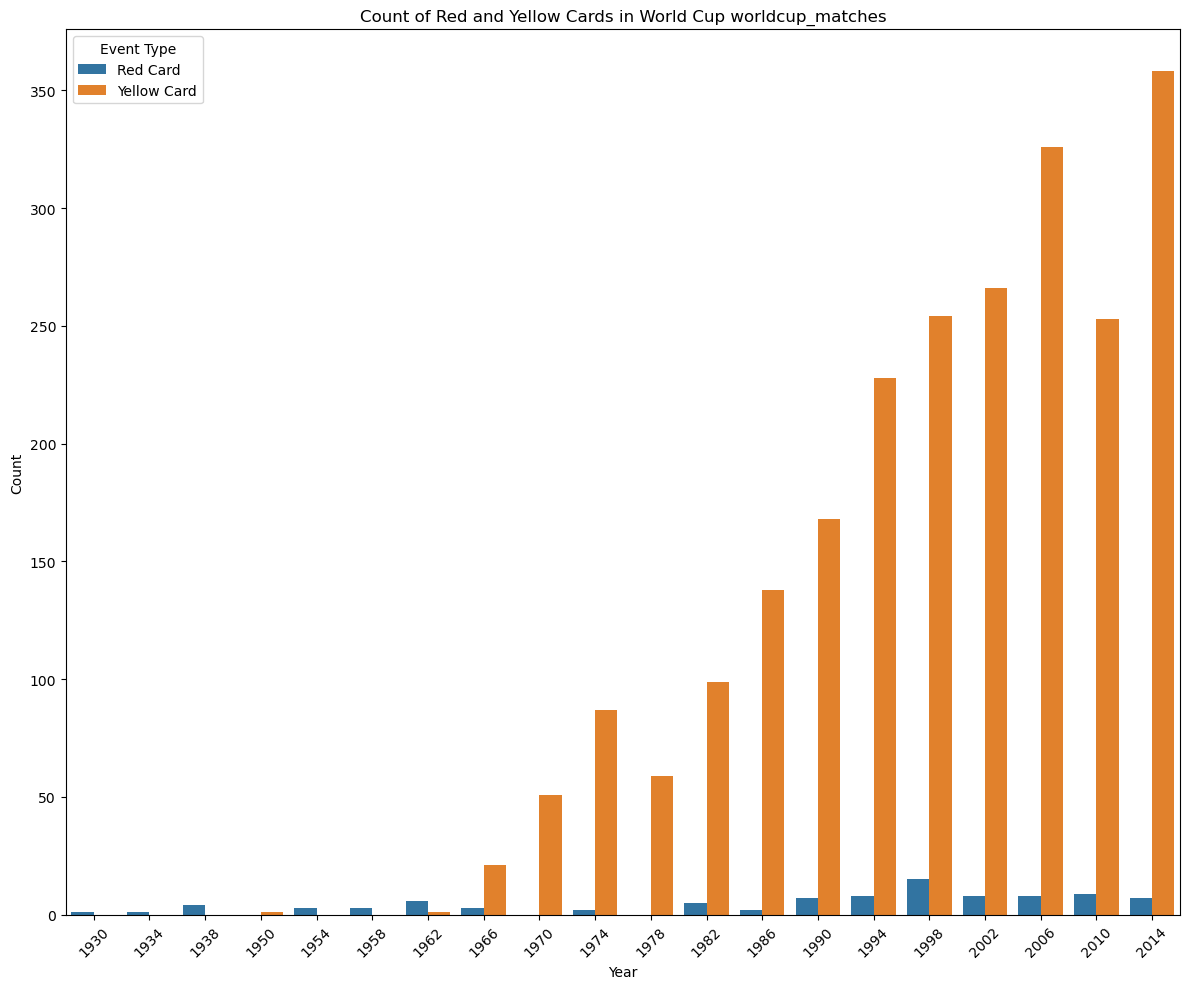

In [202]:
# Merging the players dataset and matches dataset
merged_df = pd.merge(players_df, worldcup_matches, on=['RoundID', 'MatchID'])
# Perform data munging to select the exact event that happened
merged_df['EventType'] = merged_df['Event'].str.extract(r'([RY])') 
# Plotting the count plot of red and yellow cards in World Cup worldcup_matches throughout the years
plt.figure(figsize=(12, 10))
sns.countplot(x='Year', hue='EventType', data=merged_df)
plt.title('Count of Red and Yellow Cards in World Cup worldcup_matches')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Event Type', labels=['Red Card', 'Yellow Card'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()